In [203]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [204]:
data_dir = '/Users/steven/surfdrive/data/learningTask/raw/'
subj_id = 14
blocks = [1,2,3,4,5,6]

In [205]:
data = []
for block in blocks:
    fn = glob.glob(os.path.join(data_dir, '%s_*_block-%d.csv' %(subj_id, block)))[0]
    data.append(pd.read_csv(fn))
    
data = pd.concat(data)
# force RT as numeric, outcomes
data['rt'] = pd.to_numeric(data['rt'], errors='coerce')
data['outcome'] = pd.to_numeric(data['outcome'], errors='coerce')

# Code choices better: what direction was chosen?
data['choice_direction'] = np.nan
data.loc[data['response']=='slash', 'choice_direction'] = 'right'
data.loc[data['response']=='z', 'choice_direction'] = 'left'

# what symbol was chosen?
data['choice_symbol'] = np.nan
data.loc[data['response']=='slash', 'choice_symbol'] = data.loc[data['response']=='slash', 'stim_right']
data.loc[data['response']=='z', 'choice_symbol'] = data.loc[data['response']=='z', 'stim_left']

# was this the high or low probability symbol?
data['choice_is_highp'] = np.nan
data.loc[data['choice_symbol']==data['stim_high'], 'choice_is_highp'] = 1
data.loc[data['choice_symbol']==data['stim_low'], 'choice_is_highp'] = 0

#
data['choice_options'] = [x[0]+x[1] for x in data[['stim_left', 'stim_right']].values.tolist()]

# remove some columns
data = data[[x for x in data.columns if not '_time' in x and not 'phase_' in x]]
data = data[[x for x in data.columns if not 'annotate' in x and not 'ran' in x and not 'trial_ID' in x and not 'order' in x]]
data.head()

,TrialNumber,stim_right,stim_high,stimulus_set,stim_left,cue,p_win_right,p_win_incorrect,p_win_correct,p_win_left,...,rt,response,deadline,points_earned,outcome,total_points_earned,choice_direction,choice_symbol,choice_is_highp,choice_options
0,1,A,B,0,B,ACC,0.20,0.20,0.80,0.80,...,0.666705,slash,2.000000,0,0,0,right,A,0.0,BA
1,2,B,B,0,A,SPD,0.80,0.20,0.80,0.20,...,0.883387,slash,2.000000,0,0,0,right,B,1.0,AB
2,3,M,N,2,N,ACC,0.35,0.35,0.65,0.65,...,0.900001,z,2.000000,0,0,0,left,N,1.0,NM
3,4,A,B,0,B,SPD,0.20,0.20,0.80,0.80,...,0.483392,z,1.194613,0,0,0,left,B,1.0,BA
4,5,A,B,0,B,SPD,0.20,0.20,0.80,0.80,...,0.400047,z,0.801585,100,1,100,left,B,1.0,BA


### Some checks:
1. Were the stimuli always presented equally often in each position?
2. Equal speed/accuracy trials?
3. How long did this take?
4. Proportions of reinforced responses per stimulus?
5. Frame intervals OK?

1.

In [206]:
data.groupby(['choice_options'])[['stim_right', 'stim_left']].describe()

stim_right                 stim_left                
                    count unique top freq     count unique top freq
choice_options                                                     
AB                     72      1   B   72        72      1   A   72
BA                     72      1   A   72        72      1   B   72
JK                     72      1   K   72        72      1   J   72
KJ                     72      1   J   72        72      1   K   72
MN                     72      1   N   72        72      1   M   72
NM                     72      1   M   72        72      1   N   72
OP                     72      1   P   72        72      1   O   72
PO                     72      1   O   72        72      1   P   72
WX                     72      1   X   72        72      1   W   72
XW                     72      1   W   72        72      1   X   72
ce                     72      1   e   72        72      1   c   72
ec                     72      1   c   72        72      1   e   72

2.

In [207]:
data.groupby('cue')['cue'].count()

cue
ACC    216
SPD    216
Name: cue, dtype: int64

3.

In [208]:
#data.iloc[-1].iti_time/60

4. 

In [209]:
data.groupby(['stim_high', 'stim_low'])[['p_win_correct', 'p_win_incorrect']].mean()

,,p_win_correct,p_win_incorrect
stim_high,stim_low,,
B,A,0.80,0.20
K,J,0.70,0.30
N,M,0.65,0.35
P,O,0.80,0.20
X,W,0.70,0.30
e,c,0.65,0.35


In [210]:
data.groupby('choice_symbol')['outcome'].apply(np.mean)

choice_symbol
A    0.200000
B    0.750000
J    0.255319
K    0.659794
M    0.400000
N    0.685393
O    0.500000
P    0.862319
W    0.166667
X    0.714286
c    0.000000
e    0.709220
Name: outcome, dtype: float64

In [211]:
# How often was each symbol chosen?
data.groupby('choice_symbol')['choice_symbol'].count()

choice_symbol
A     20
B    124
J     47
K     97
M     55
N     89
O      6
P    138
W     18
X    126
c      3
e    141
Name: choice_symbol, dtype: int64

In [213]:
# Did the pp learn it?
data.groupby(['stimulus_set', 'block'])['choice_is_highp'].mean()

stimulus_set  block
0             1        0.833333
              2        0.812500
              3        0.937500
1             1        0.708333
              2        0.729167
              3        0.583333
2             1        0.375000
              2        0.687500
              3        0.791667
3             4        0.937500
              5        0.979167
              6        0.958333
4             4        0.791667
              5        0.979167
              6        0.854167
5             4        0.958333
              5        0.979167
              6        1.000000
Name: choice_is_highp, dtype: float64

In [202]:
print(data.groupby(['choice_direction'])['choice_direction'].count())
print(data.groupby(['block', 'choice_direction'])['choice_direction'].count())

choice_direction
left     447
right    416
Name: choice_direction, dtype: int64
block  choice_direction
1      left                 95
       right                49
2      left                100
       right                44
3      left                 65
       right                79
4      left                 83
       right                60
5      left                 49
       right                95
6      left                 55
       right                89
Name: choice_direction, dtype: int64


In [197]:
# What was the mean RT per symbol?
data.groupby('choice_symbol')['rt'].mean()

choice_symbol
A    0.404117
B    0.418632
J    0.427201
K    0.450537
M    0.425707
N    0.436227
O    0.409373
P    0.401679
W    0.392462
X    0.412894
c    0.407726
e    0.422762
Name: rt, dtype: float64

In [198]:
# Mean RT per stimulus set (~difficulty)?
data.groupby('stimulus_set')['rt'].mean()

stimulus_set
0    0.416393
1    0.405312
2    0.403955
3    0.431917
4    0.412237
5    0.440976
Name: rt, dtype: float64

In [200]:
data.groupby(['stimulus_set', 'choice_options'])['p_win_correct'].mean()

stimulus_set  choice_options
0             ce                0.80
              ec                0.80
1             OP                0.70
              PO                0.70
2             WX                0.65
              XW                0.65
3             MN                0.80
              NM                0.80
4             AB                0.70
              BA                0.70
5             JK                0.65
              KJ                0.65
Name: p_win_correct, dtype: float64

5.

In [64]:
# find corresponding frame intervals
fn = glob.glob(os.path.join(data_dir, '%s*all_frameintervals.log'%subj_id))[0]
with open(fn, 'r') as f:
    intervals = f.read().split(', ')
intervals = [float(x) for x in intervals]

/Users/steven/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Mean=8.4ms, s.d.=10.06, 99%CI(frame)=-17.59-34.34')

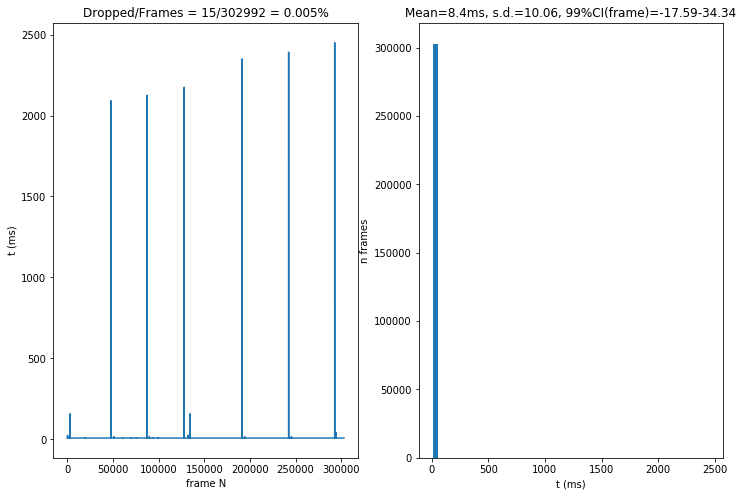

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
# Make a nice figure
intervals_ms = np.array(intervals) * 1000
m = np.mean(intervals_ms)
sd = np.std(intervals_ms)

msg = "Mean=%.1fms, s.d.=%.2f, 99%%CI(frame)=%.2f-%.2f"
dist_string = msg % (m, sd, m - 2.58 * sd, m + 2.58 * sd)
n_total = len(intervals_ms)
n_dropped = sum(intervals_ms > (1.5 * m))
msg = "Dropped/Frames = %i/%i = %.3f%%"
dropped_string = msg % (n_dropped, n_total, 100 * n_dropped / float(n_total))

# plot the frame intervals
plt.figure(figsize=[12, 8])
plt.subplot(1, 2, 1)
plt.plot(intervals_ms, '-')
plt.ylabel('t (ms)')
plt.xlabel('frame N')
plt.title(dropped_string)

plt.subplot(1, 2, 2)
plt.hist(intervals_ms, 50, normed=0, histtype='stepfilled')
plt.xlabel('t (ms)')
plt.ylabel('n frames')
plt.title(dist_string)
#plt.savefig(output_fn_frames + '_frameintervals.png')

### Look at data
First, without SPD/ACC

In [21]:
data_vanilla = data.loc[pd.isnull(data.cue)].copy()
data_vanilla.head()

,TrialNumber,stim_right,trial_ID,annotate,stim_high,stimulus_set,stim_left,phase_7,phase_6,phase_5,...,jitter_time_1,cue_time,jitter_time_2,stimulus_time,selection_time,feedback_time,iti_time,choice_direction,choice_symbol,choice_is_highp
0,1,B,0,False,A,0,A,0.949815,0.75,0.5,...,40.815014,40.815020,40.815025,41.281525,41.789850,42.548134,42.998130,left,A,1.0
1,2,M,1,False,M,2,N,0.760788,0.75,0.5,...,43.000507,43.000510,43.000520,43.306465,43.806500,44.564785,44.831482,NaN,NaN,NaN
2,3,K,2,False,J,1,J,0.819831,0.75,0.5,...,44.833035,44.833042,44.833050,45.223160,45.731490,46.489800,46.814816,left,J,1.0
3,4,M,3,False,M,2,N,0.947617,0.75,0.5,...,46.816357,46.816360,46.816370,47.406480,47.914810,48.673138,49.123093,NaN,NaN,NaN
4,5,K,4,False,J,1,J,0.615615,0.75,0.5,...,49.124650,49.124653,49.124660,49.723106,50.231422,50.981460,51.098125,NaN,NaN,NaN


In [22]:
np.sort(data_vanilla.stimulus_set.unique())

array([0, 1, 2])

/Users/steven/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


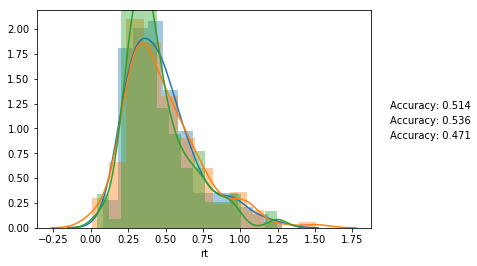

In [23]:
for i in np.sort(data_vanilla.stimulus_set.unique()):
    rts = data_vanilla.loc[(data_vanilla['stimulus_set']==i) & pd.notnull(data_vanilla.rt), 'rt']
    acc = data_vanilla.loc[(data_vanilla['stimulus_set']==i) & pd.notnull(data_vanilla.rt), 'choice_is_highp'].mean()
    sns.distplot(data_vanilla.loc[(data_vanilla['stimulus_set']==i) & pd.notnull(data_vanilla.rt), 'rt'])
    plt.text(2.0, 1.2-0.15*i, s='Accuracy: %.3f' %acc)

with SAT

In [24]:
data_sat = data.loc[pd.notnull(data.cue)].copy()
data_sat.head()

,TrialNumber,stim_right,trial_ID,annotate,stim_high,stimulus_set,stim_left,phase_7,phase_6,phase_5,...,jitter_time_1,cue_time,jitter_time_2,stimulus_time,selection_time,feedback_time,iti_time,choice_direction,choice_symbol,choice_is_highp
0,1,X,0,False,W,4,W,0.868267,0.75,0.5,...,966.30920,967.06740,967.06740,967.29236,967.80066,968.55896,968.93396,NaN,NaN,NaN
1,2,e,1,False,c,5,c,0.903372,0.75,0.5,...,968.93634,969.69230,969.69230,969.99230,970.50060,971.25070,971.65900,NaN,NaN,NaN
2,3,O,2,False,O,3,P,0.744822,0.75,0.5,...,971.66050,972.41730,972.41736,973.11730,973.62570,974.38400,974.63400,left,P,0.0
3,4,c,3,False,c,5,e,0.752801,0.75,0.5,...,974.63550,975.39230,975.39233,975.83400,976.34230,977.10060,977.35890,left,e,0.0
4,5,W,4,False,W,4,X,0.836135,0.75,0.5,...,977.36050,978.11725,978.11725,978.53390,979.03394,979.79230,980.13390,NaN,NaN,NaN


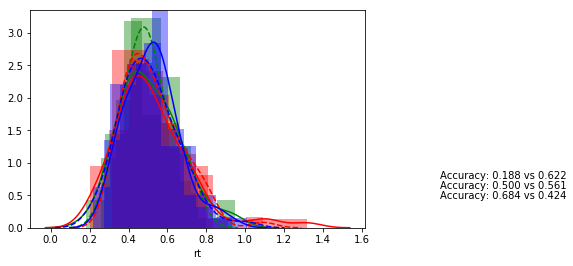

In [25]:
for coln, i in enumerate(np.sort(data_sat.stimulus_set.unique())):
    color = ['green', 'red', 'blue'][coln]
    accs = []
    for ii, cue in enumerate(['SPD', 'ACC']):
        lty = '--' if ii==1 else '-'
        idx = (data_sat['stimulus_set']==i) & pd.notnull(data_sat.rt) & (data_sat['cue']==cue)
        rts = data_vanilla.loc[idx, 'rt']
        accs.append(data_vanilla.loc[idx, 'choice_is_highp'].mean())

        sns.distplot(data_sat.loc[idx, 'rt'],
                     kde_kws={'linestyle': lty,'color': color},
                     hist_kws={'color': color})
    plt.text(2.0, 1.2-0.15*i, s='Accuracy: %.3f vs %.3f' %(accs[0], accs[1]))